In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Years = ['18','19','20','21']

In [3]:
CY = '17'

In [4]:
Data = pd.read_csv('DATA{0}.csv'.format(CY))
#Data.head()

In [5]:
Data = Data.loc[Data['YEAR BUILT']>0] #Blueberry


In [6]:
Data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS PRE,BLOCK,LOT,EASE-MENT,BUILDING CLASS,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,...,11,0,11,1750,6500,1900,2,C4,3750000,2017-04-03 00:00:00
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,...,24,1,25,2650,9960,1910,2,C7,5235000,2017-07-11 00:00:00
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,...,5,0,5,2139,4416,1900,2,C2,0,2017-06-16 00:00:00
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,61,,C7,193 EAST 4TH STREET,...,11,1,12,2388,8045,1900,2,C7,7675000,2017-11-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88654,9591,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,136,,B2,86 ROBIN COURT,...,2,0,2,2450,2500,1995,1,B2,627500,2017-12-18 00:00:00
88655,9592,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,50,,B9,23 QUAIL LANE,...,2,0,2,4765,2575,1998,1,B9,690000,2017-09-14 00:00:00
88656,9593,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
88657,9594,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00


In [7]:
Data2 = Data[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY', 'BOROUGH']]
Data2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009,6500,3750000,C4,07 RENTALS - WALKUP APARTMENTS,1
1,10009,9960,5235000,C7,07 RENTALS - WALKUP APARTMENTS,1
2,10009,4416,0,C2,07 RENTALS - WALKUP APARTMENTS,1
3,10009,6440,6625000,C2,07 RENTALS - WALKUP APARTMENTS,1
4,10009,8045,7675000,C7,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
88654,10309,2500,627500,B2,02 TWO FAMILY DWELLINGS,5
88655,10309,2575,690000,B9,02 TWO FAMILY DWELLINGS,5
88656,10309,2377,550000,B9,02 TWO FAMILY DWELLINGS,5
88657,10309,1496,460000,B2,02 TWO FAMILY DWELLINGS,5


Dataframe with only residential buildings between building class A-D  
https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html

In [8]:
#accessing building class category using Building class id
#filtering out residential buildings 
cat = ['A', 'B', 'C', 'D']
Data2['BUILDING CLASS ID'] = Data2['BUILDING CLASS'].apply(lambda x: x[:1]). astype(str)
#Data2#apply a custom inline function taking first digit of the category




In [9]:
#new dataframe with only residential buildings in 2017

Data3 = Data2.loc[(Data2['BUILDING CLASS ID'].isin(cat))]
Data3
Data3['BUILDING CLASS ID'].unique()

array(['C', 'D', 'A', 'B'], dtype=object)

Sanity checks for new 2017 Dataframe 

In [10]:
Data3 = Data3.loc[(Data3['ZIP CODE']>=10000)&(Data3['ZIP CODE']<11500)]

In [11]:
Data3 = Data3.loc[Data3['SALE PRICE']>0]

In [12]:
Data3 = Data3.loc[Data3['GROSS SQUARE FEET']>0]
Data3.to_csv('2017_residentialbuildingswithid')

In [13]:
#2017 residential buildings with groupby 
Data4 = Data3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data4 = Data4.groupby(by=['ZIP CODE','BOROUGH']).sum()
#Data4

In [14]:
Data4['PPSQ{0}'.format(CY)]=Data4['SALE PRICE']/Data4['GROSS SQUARE FEET']
#Data4.head()

In [15]:
FinData_2017 = Data4
FinData_2017.head()

,,GROSS SQUARE FEET,SALE PRICE,PPSQ17
ZIP CODE,BOROUGH,,,
10001,1,28108,44336548,1577.364024
10002,1,592577,417873625,705.180297
10003,1,414097,134447506,324.676358
10007,1,21840,15000000,686.813187
10009,1,115428,111261204,963.901341


In [16]:
#2018 data
Data_2018 = pd.read_csv('DATA18.csv')
Data_2018 = Data_2018.loc[(Data_2018['YEAR BUILT']>0) & (Data_2018['ZIP CODE']>=10000) & (Data_2018['ZIP CODE']<11500)] 
Data_2018_1 = Data_2018[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY', 'BOROUGH']]
Data_2018_1
    
    

    

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,2183.0,0,A4,01 ONE FAMILY DWELLINGS,1
1,10009.0,2183.0,4844809,A4,01 ONE FAMILY DWELLINGS,1
2,10009.0,5200.0,6100000,A4,01 ONE FAMILY DWELLINGS,1
3,10009.0,4764.0,0,B1,02 TWO FAMILY DWELLINGS,1
4,10009.0,4520.0,0,B9,02 TWO FAMILY DWELLINGS,1
...,...,...,...,...,...,...
83776,10309.0,1850.0,680000,B9,02 TWO FAMILY DWELLINGS,5
83777,10309.0,0.0,793216,V0,05 TAX CLASS 1 VACANT LAND,5
83778,10309.0,2612.0,671026,A5,05 TAX CLASS 1 VACANT LAND,5
83779,10309.0,2612.0,610950,A5,05 TAX CLASS 1 VACANT LAND,5


In [17]:
Data_2018_1['BUILDING CLASS'] = Data_2018_1['BUILDING CLASS'].astype(str)
Data_2018_1['BUILDING CLASS ID'] = Data_2018_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2018_2 = Data_2018_1.loc[(Data_2018_1['BUILDING CLASS ID'].isin(cat))]
Data_2018_2.shape

#Data_2018_2 is the dataframe with builing id - shape 56811

(56811, 7)

In [18]:
Data_2018_3 = Data_2018_2.loc[Data_2018_2['SALE PRICE']>0]
Data_2018_3 = Data_2018_3.loc[Data_2018_3['GROSS SQUARE FEET']>0]






In [19]:
Data_2018_4 = Data_2018_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2018_4 = Data_2018_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2018_4['PPSQ18'] = Data_2018_4['SALE PRICE']/Data_2018_4['GROSS SQUARE FEET']
Data_2018_4



,,GROSS SQUARE FEET,SALE PRICE,PPSQ18
ZIP CODE,BOROUGH,,,
10001.0,1,6735.0,9900000,1469.933185
10002.0,1,169499.0,154045000,908.825421
10003.0,1,325988.0,259412047,795.771768
10009.0,1,471662.0,264883115,561.595200
10010.0,1,22246.0,31200000,1402.499326
...,...,...,...,...
11432.0,4,488100.0,192835226,395.073194
11433.0,4,507884.0,162366947,319.692975
11434.0,4,901588.0,290896868,322.649445


In [20]:
Data_2019 = pd.read_csv('DATA19.csv')
Data_2019 = Data_2019.loc[(Data_2019['YEAR BUILT']>0) & (Data_2019['ZIP CODE']>=10000) & (Data_2019['ZIP CODE']<11500)] 
Data_2019_1 = Data_2019[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2019_1
    

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,3680.0,3200000,S1,01 ONE FAMILY DWELLINGS,1
1,10009.0,2183.0,0,A4,01 ONE FAMILY DWELLINGS,1
2,10009.0,4520.0,0,B9,02 TWO FAMILY DWELLINGS,1
3,10009.0,3600.0,6300000,C0,03 THREE FAMILY DWELLINGS,1
4,10009.0,5110.0,0,C0,03 THREE FAMILY DWELLINGS,1
...,...,...,...,...,...,...
83914,10309.0,1710.0,0,B9,02 TWO FAMILY DWELLINGS,5
83915,10309.0,1710.0,637500,B9,02 TWO FAMILY DWELLINGS,5
83916,10309.0,0.0,599701,B9,05 TAX CLASS 1 VACANT LAND,5
83917,10309.0,0.0,896060,B9,05 TAX CLASS 1 VACANT LAND,5


In [21]:
Data_2019_1['BUILDING CLASS'] = Data_2019_1['BUILDING CLASS'].astype(str)
Data_2019_1['BUILDING CLASS ID'] = Data_2019_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2019_2 = Data_2019_1.loc[(Data_2019_1['BUILDING CLASS ID'].isin(cat))]
Data_2019_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
1,10009.0,2183.0,0,A4,01 ONE FAMILY DWELLINGS,1,A
2,10009.0,4520.0,0,B9,02 TWO FAMILY DWELLINGS,1,B
3,10009.0,3600.0,6300000,C0,03 THREE FAMILY DWELLINGS,1,C
4,10009.0,5110.0,0,C0,03 THREE FAMILY DWELLINGS,1,C
5,10009.0,7989.0,1950000,C1,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
83913,10309.0,2565.0,625000,B9,02 TWO FAMILY DWELLINGS,5,B
83914,10309.0,1710.0,0,B9,02 TWO FAMILY DWELLINGS,5,B
83915,10309.0,1710.0,637500,B9,02 TWO FAMILY DWELLINGS,5,B
83916,10309.0,0.0,599701,B9,05 TAX CLASS 1 VACANT LAND,5,B


In [22]:
Data_2019_3 = Data_2019_2.loc[Data_2019_2['SALE PRICE']>0]
Data_2019_3 = Data_2019_3.loc[Data_2019_3['GROSS SQUARE FEET']>0]

In [23]:
Data_2019_4 = Data_2019_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2019_4 = Data_2019_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2019_4['PPSQ19'] = Data_2019_4['SALE PRICE']/Data_2019_4['GROSS SQUARE FEET']
Data_2019_4.head()


,,GROSS SQUARE FEET,SALE PRICE,PPSQ19
ZIP CODE,BOROUGH,,,
10001.0,1,298696.0,246400000,824.918981
10002.0,1,224263.0,133872340,596.943499
10003.0,1,483259.0,287712700,595.359217
10009.0,1,315238.0,100264389,318.059336
10010.0,1,3080.0,3700000,1201.298701


In [24]:
Data_2020 = pd.read_csv('DATA20.csv')
Data_2020 = Data_2020.loc[(Data_2020['YEAR BUILT']>0) & (Data_2020['ZIP CODE']>=10000) & (Data_2020['ZIP CODE']<11500)] 
Data_2020_1 = Data_2020[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2020_1

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5


In [25]:
Data_2020_1['BUILDING CLASS'] = Data_2020_1['BUILDING CLASS'].astype(str)
Data_2020_1['BUILDING CLASS ID'] = Data_2020_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2020_2 = Data_2020_1.loc[(Data_2020_1['BUILDING CLASS ID'].isin(cat))]
Data_2020_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1,B
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1,C
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1,C
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5,B
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5,B
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5,B
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5,B


In [26]:
Data_2020_3 = Data_2020_2.loc[Data_2020_2['SALE PRICE']>0]
Data_2020_3 = Data_2020_3.loc[Data_2020_3['GROSS SQUARE FEET']>0]
Data_2020_3


,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1,C
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1,C
5,10009.0,13206.0,1,C4,07 RENTALS - WALKUP APARTMENTS,1,C
6,10009.0,13248.0,2500,C4,07 RENTALS - WALKUP APARTMENTS,1,C
7,10009.0,13248.0,290000,C4,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
68675,10309.0,1850.0,665000,B9,02 TWO FAMILY DWELLINGS,5,B
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5,B
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5,B
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5,B


In [27]:
Data_2020_4 = Data_2020_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2020_4 = Data_2020_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2020_4['PPSQ20'] = Data_2020_4['SALE PRICE']/Data_2020_4['GROSS SQUARE FEET']
Data_2020_4

,,GROSS SQUARE FEET,SALE PRICE,PPSQ20
ZIP CODE,BOROUGH,,,
10002.0,1,703462.0,452662600,643.478397
10003.0,1,103177.0,104977156,1017.447261
10009.0,1,9389957.0,89390690,9.519819
10010.0,1,7440.0,12175000,1636.424731
10011.0,1,120962.0,173172068,1431.623717
...,...,...,...,...
11432.0,4,362054.0,144417504,398.883879
11433.0,4,327696.0,105863468,323.053891
11434.0,4,601425.0,213710631,355.340451


In [28]:
Data_2020 = pd.read_csv('DATA20.csv')
Data_2020 = Data_2020.loc[(Data_2020['YEAR BUILT']>0) & (Data_2020['ZIP CODE']>=10000) & (Data_2020['ZIP CODE']<11500)] 
Data_2020_1 = Data_2020[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2020_1

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5


In [29]:
Data_2020_1['BUILDING CLASS'] = Data_2020_1['BUILDING CLASS'].astype(str)
Data_2020_1['BUILDING CLASS ID'] = Data_2020_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2020_2 = Data_2020_1.loc[(Data_2020_1['BUILDING CLASS ID'].isin(cat))]
Data_2020_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1,B
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1,C
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1,C
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5,B
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5,B
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5,B
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5,B


In [30]:
Data_2021 = pd.read_csv('DATA21.csv')
Data_2021 = Data_2021.loc[(Data_2021['YEAR BUILT']>0) & (Data_2021['ZIP CODE']>=10000) & (Data_2021['ZIP CODE']<11500)] 
Data_2021_1 = Data_2021[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2021_1

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,4400.0,2385000,A4,01 ONE FAMILY DWELLINGS,1
1,10009.0,2160.0,3025000,B1,02 TWO FAMILY DWELLINGS,1
2,10009.0,9750.0,154196,C4,07 RENTALS - WALKUP APARTMENTS,1
3,10009.0,11017.0,0,C4,07 RENTALS - WALKUP APARTMENTS,1
4,10009.0,17754.0,7500000,C1,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
99082,10309.0,2178.0,219973,B9,02 TWO FAMILY DWELLINGS,5
99083,10309.0,2400.0,0,B2,02 TWO FAMILY DWELLINGS,5
99084,10309.0,2250.0,550000,B9,02 TWO FAMILY DWELLINGS,5
99085,10309.0,2565.0,638500,B9,02 TWO FAMILY DWELLINGS,5


In [31]:
Data_2021_1['BUILDING CLASS'] = Data_2021_1['BUILDING CLASS'].astype(str)
Data_2021_1['BUILDING CLASS ID'] = Data_2021_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2021_2 = Data_2021_1.loc[(Data_2021_1['BUILDING CLASS ID'].isin(cat))]
Data_2021_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,4400.0,2385000,A4,01 ONE FAMILY DWELLINGS,1,A
1,10009.0,2160.0,3025000,B1,02 TWO FAMILY DWELLINGS,1,B
2,10009.0,9750.0,154196,C4,07 RENTALS - WALKUP APARTMENTS,1,C
3,10009.0,11017.0,0,C4,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,17754.0,7500000,C1,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
99082,10309.0,2178.0,219973,B9,02 TWO FAMILY DWELLINGS,5,B
99083,10309.0,2400.0,0,B2,02 TWO FAMILY DWELLINGS,5,B
99084,10309.0,2250.0,550000,B9,02 TWO FAMILY DWELLINGS,5,B
99085,10309.0,2565.0,638500,B9,02 TWO FAMILY DWELLINGS,5,B


In [32]:
Data_2021_3 = Data_2021_2.loc[Data_2021_2['SALE PRICE']>0]
Data_2021_3 = Data_2021_3.loc[Data_2021_3['GROSS SQUARE FEET']>0]
Data_2021_3

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,4400.0,2385000,A4,01 ONE FAMILY DWELLINGS,1,A
1,10009.0,2160.0,3025000,B1,02 TWO FAMILY DWELLINGS,1,B
2,10009.0,9750.0,154196,C4,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,17754.0,7500000,C1,07 RENTALS - WALKUP APARTMENTS,1,C
5,10009.0,5320.0,3425000,C7,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
99081,10309.0,2007.0,675000,B9,02 TWO FAMILY DWELLINGS,5,B
99082,10309.0,2178.0,219973,B9,02 TWO FAMILY DWELLINGS,5,B
99084,10309.0,2250.0,550000,B9,02 TWO FAMILY DWELLINGS,5,B
99085,10309.0,2565.0,638500,B9,02 TWO FAMILY DWELLINGS,5,B


In [33]:
Data_2021_4 = Data_2021_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2021_4 = Data_2021_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2021_4['PPSQ21'] = Data_2021_4['SALE PRICE']/Data_2021_4['GROSS SQUARE FEET']
Data_2021_4

,,GROSS SQUARE FEET,SALE PRICE,PPSQ21
ZIP CODE,BOROUGH,,,
10001.0,1,87821.0,17532581,199.639961
10002.0,1,142549.0,86510000,606.879038
10003.0,1,498519.0,561175328,1125.684935
10009.0,1,225035.0,162820734,723.535157
10010.0,1,10200.0,12600000,1235.294118
...,...,...,...,...
11432.0,4,421294.0,196982678,467.565828
11433.0,4,358231.0,134897165,376.564745
11434.0,4,672111.0,266433830,396.413435


In [34]:
FinData1 = pd.merge(Data4,Data_2018_4,left_on = ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData2 = pd.merge(FinData1,Data_2019_4, left_on =  ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData3 = pd.merge(FinData2,Data_2020_4, left_on =  ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData4 = pd.merge(FinData3,Data_2021_4, left_on = ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData4

,,GROSS SQUARE FEET_x,SALE PRICE_x,PPSQ17,GROSS SQUARE FEET_y,SALE PRICE_y,PPSQ18,GROSS SQUARE FEET_x,SALE PRICE_x,PPSQ19,GROSS SQUARE FEET_y,SALE PRICE_y,PPSQ20,GROSS SQUARE FEET,SALE PRICE,PPSQ21
ZIP CODE,BOROUGH,,,,,,,,,,,,,,,
10001.0,1,28108.0,44336548.0,1577.364024,6735.0,9900000.0,1469.933185,298696.0,246400000.0,824.918981,NaN,NaN,NaN,87821.0,17532581.0,199.639961
10002.0,1,592577.0,417873625.0,705.180297,169499.0,154045000.0,908.825421,224263.0,133872340.0,596.943499,703462.0,452662600.0,643.478397,142549.0,86510000.0,606.879038
10003.0,1,414097.0,134447506.0,324.676358,325988.0,259412047.0,795.771768,483259.0,287712700.0,595.359217,103177.0,104977156.0,1017.447261,498519.0,561175328.0,1125.684935
10007.0,1,21840.0,15000000.0,686.813187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009.0,1,115428.0,111261204.0,963.901341,471662.0,264883115.0,561.595200,315238.0,100264389.0,318.059336,9389957.0,89390690.0,9.519819,225035.0,162820734.0,723.535157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11434.0,4,821776.0,236710548.0,288.047531,901588.0,290896868.0,322.649445,838571.0,280256426.0,334.207152,601425.0,213710631.0,355.340451,672111.0,266433830.0,396.413435
11435.0,4,353835.0,114109207.0,322.492707,431314.0,144821419.0,335.767953,363019.0,123842526.0,341.146127,732718.0,90119732.0,122.993747,780927.0,325698209.0,417.066139
11436.0,4,334953.0,101652485.0,303.482832,374106.0,129331770.0,345.708890,330073.0,115752492.0,350.687551,257265.0,101181074.0,393.295139,239053.0,105985882.0,443.357256


In [46]:
FinData_f = FinData4[["PPSQ17","PPSQ18","PPSQ19","PPSQ20","PPSQ21"]]
FinData_f["Avg_171819"] = (FinData_f["PPSQ17"] + FinData_f["PPSQ18"] +FinData_f["PPSQ19"])/3
FinData_f["Change_17-18"]= FinData_f["PPSQ17"]- FinData_f["PPSQ18"]
FinData_f["Change_18-19"]= FinData_f["PPSQ18"]- FinData_f["PPSQ19"]
FinData_f["Change_19-20"]= FinData_f["PPSQ19"]- FinData_f["PPSQ20"]
FinData_f["Change_20-21"]= FinData_f["PPSQ20"]- FinData_f["PPSQ21"]
FinData_f= FinData_f.reset_index()

In [48]:
FinData_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZIP CODE      171 non-null    float64
 1   BOROUGH       171 non-null    int64  
 2   PPSQ17        169 non-null    float64
 3   PPSQ18        169 non-null    float64
 4   PPSQ19        167 non-null    float64
 5   PPSQ20        165 non-null    float64
 6   PPSQ21        168 non-null    float64
 7   Avg_171819    166 non-null    float64
 8   Change_17-18  167 non-null    float64
 9   Change_18-19  167 non-null    float64
 10  Change_19-20  165 non-null    float64
 11  Change_20-21  165 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 16.2 KB


<AxesSubplot:>

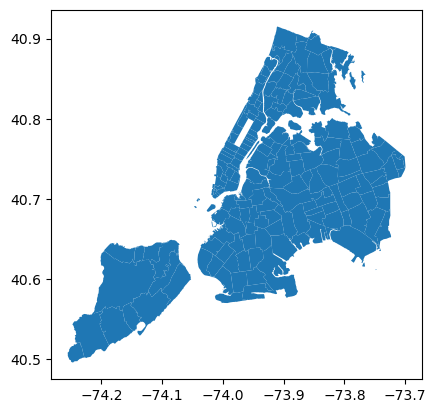

In [49]:
import geopandas as gpd
NYCzip=gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")
NYCzip = NYCzip.loc[(NYCzip['zipcode']>=10000)&(NYCzip['zipcode']<11500)]
NYCzip.plot()

In [50]:
Result = NYCzip.merge(FinData_f,left_on='zipcode',right_on='ZIP CODE')

In [53]:
Result.head()

,zipcode,geometry,ZIP CODE,BOROUGH,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21,Avg_171819,Change_17-18,Change_18-19,Change_19-20,Change_20-21
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372.0,4,121.464173,429.242159,446.848643,385.122832,376.642737,332.518325,-307.777986,-17.606485,61.725811,8.480096
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004.0,4,467.593598,506.534936,518.058025,519.204547,529.695389,497.395520,-38.941338,-11.523090,-1.146521,-10.490842
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040.0,4,470.209240,518.006233,545.990943,524.646634,567.703006,511.402139,-47.796993,-27.984710,21.344309,-43.056372
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426.0,4,401.464132,438.188459,451.622624,483.102311,496.339385,430.425072,-36.724327,-13.434165,-31.479688,-13.237073
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365.0,4,506.689815,554.357075,555.768331,537.636477,578.172563,538.938407,-47.667260,-1.411256,18.131855,-40.536086


In [59]:
Result.columns

Index(['zipcode', 'geometry', 'ZIP CODE', 'BOROUGH', 'PPSQ17', 'PPSQ18',
       'PPSQ19', 'PPSQ20', 'PPSQ21', 'Avg_171819', 'Change_17-18',
       'Change_18-19', 'Change_19-20', 'Change_20-21'],
      dtype='object')

<AxesSubplot:>

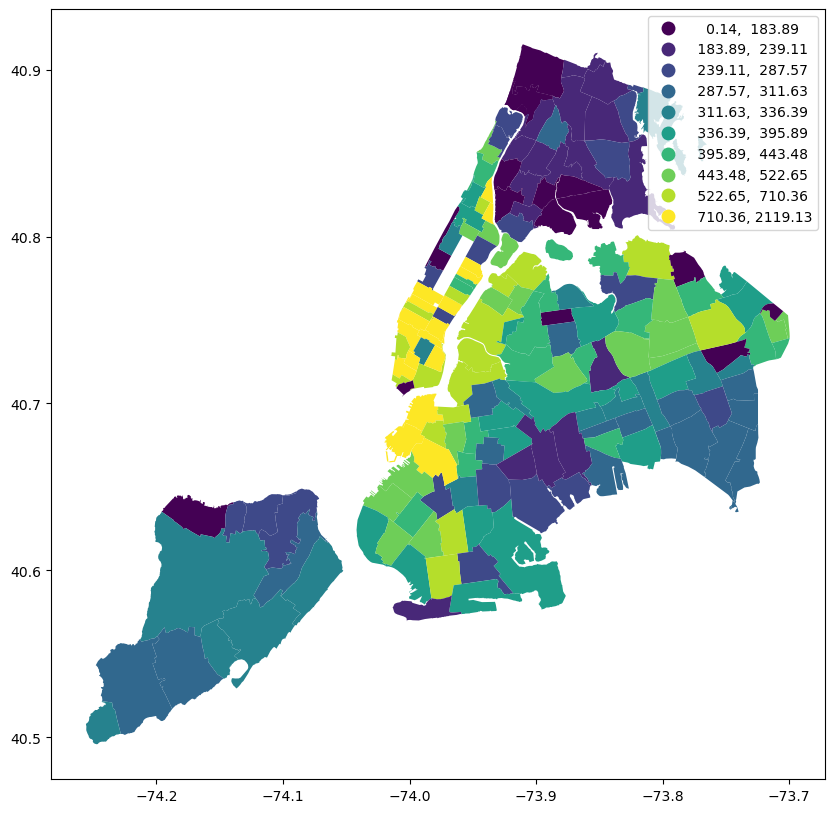

In [65]:
Result.plot(figsize = (10,10), column='PPSQ17' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

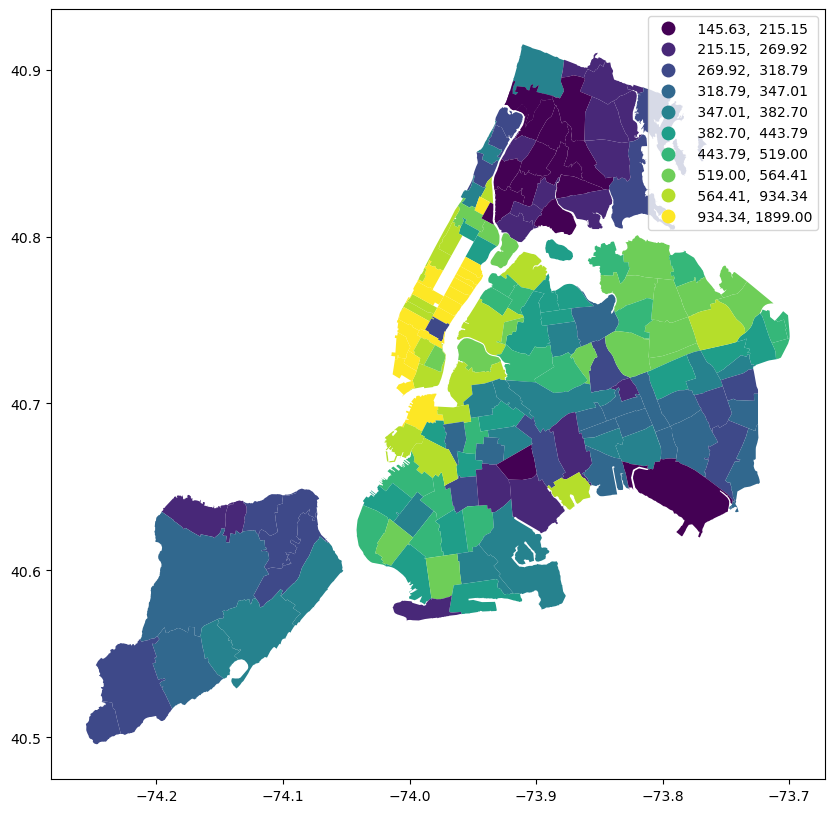

In [62]:
Result.plot(figsize = (10,10), column='PPSQ18' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

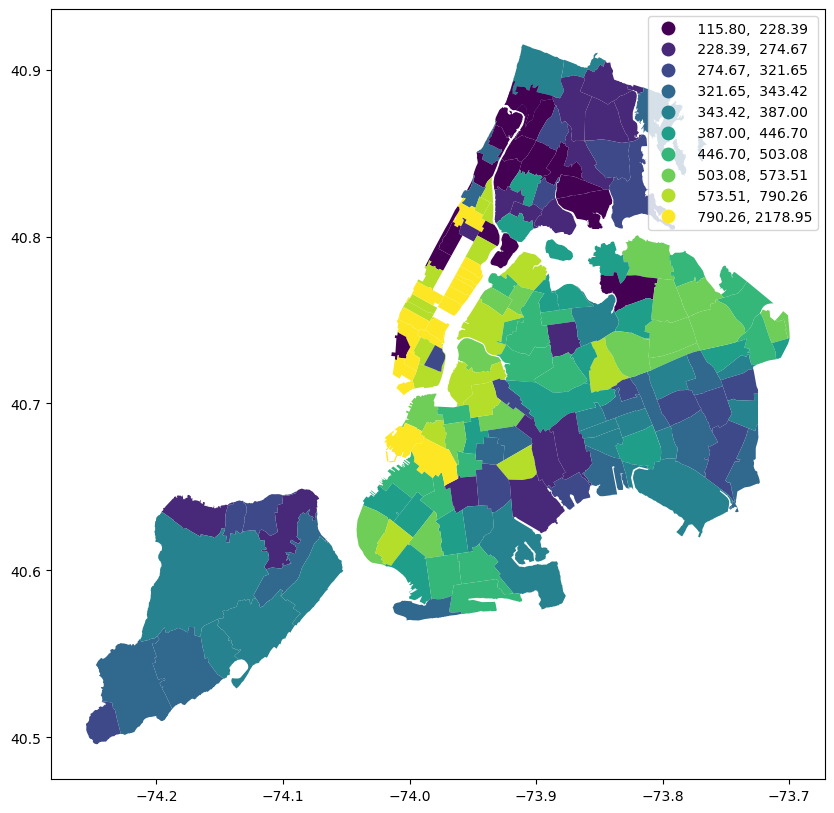

In [63]:
Result.plot(figsize = (10,10), column='PPSQ19' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

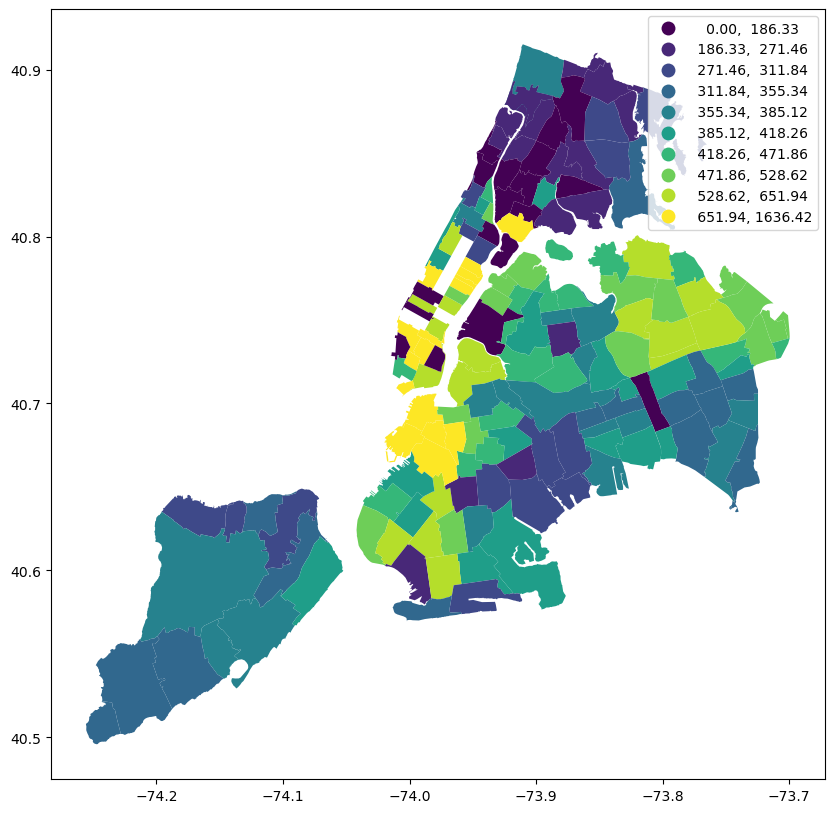

In [66]:
Result.plot(figsize = (10,10), column='PPSQ20' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

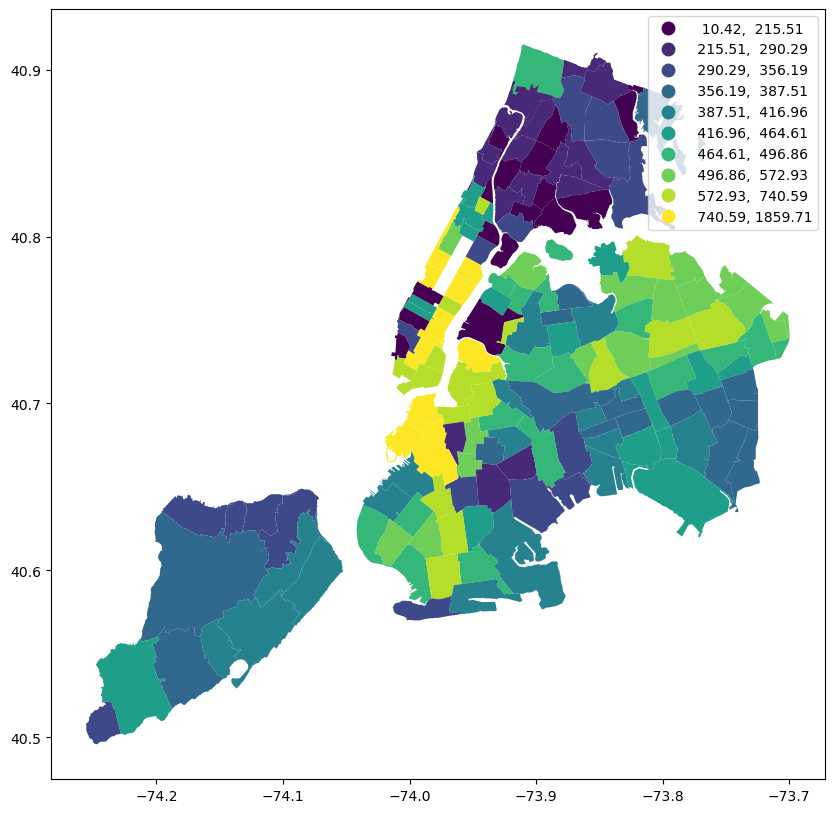

In [67]:
Result.plot(figsize = (10,10), column='PPSQ21' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

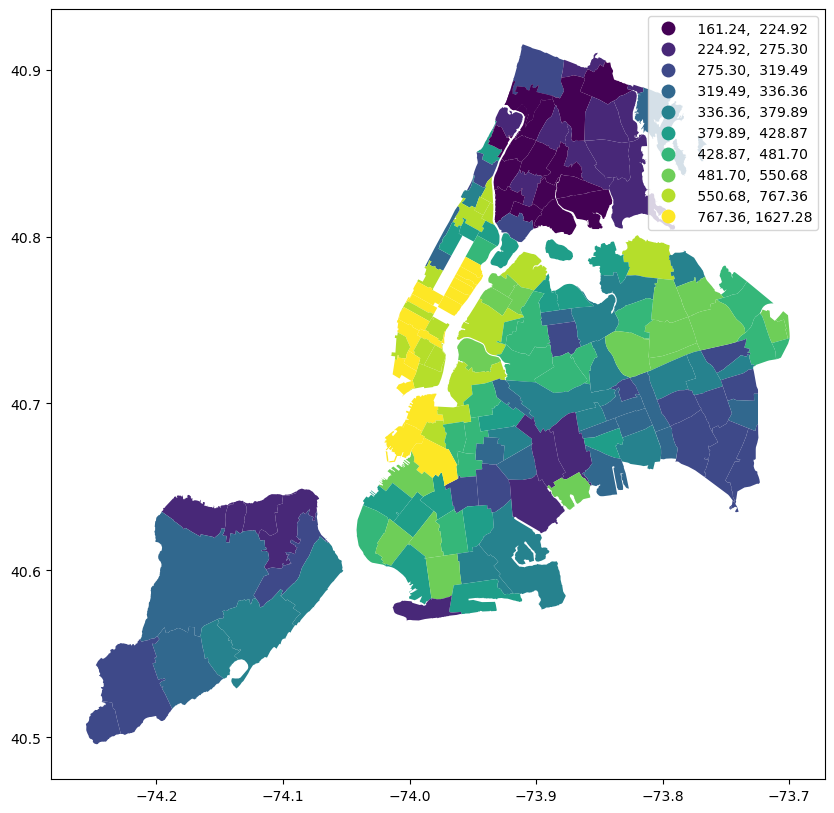

In [68]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Avg_171819' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

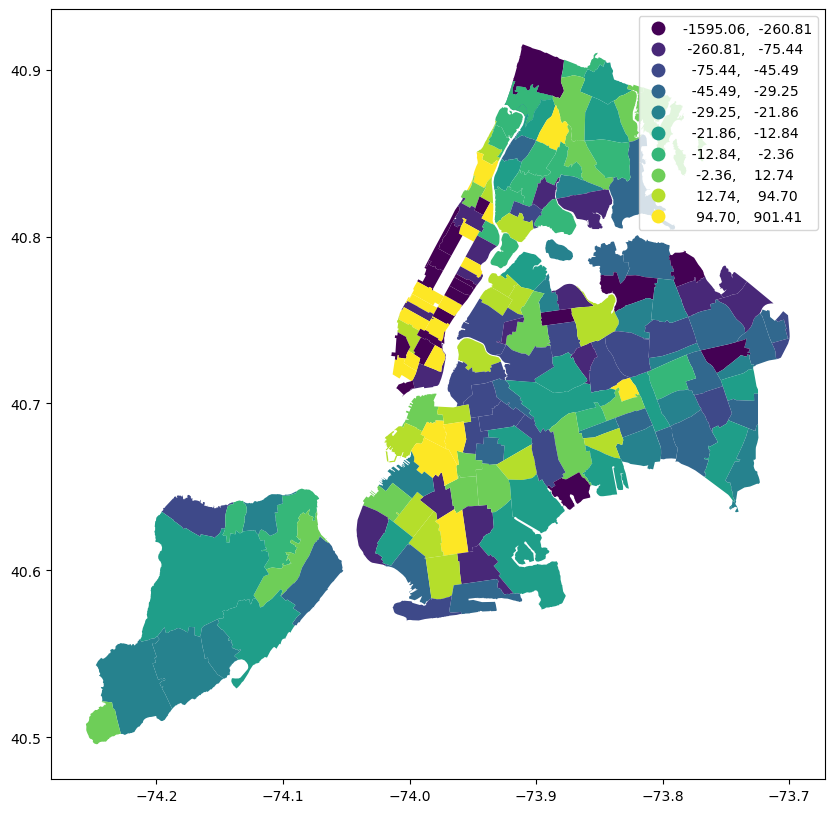

In [69]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_17-18' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

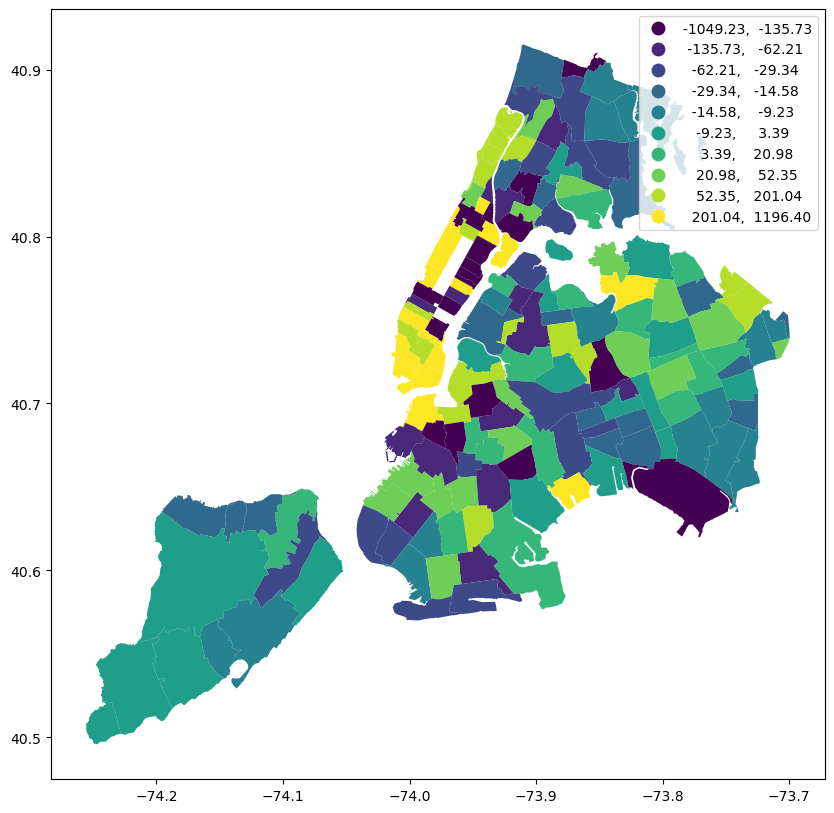

In [71]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_18-19' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

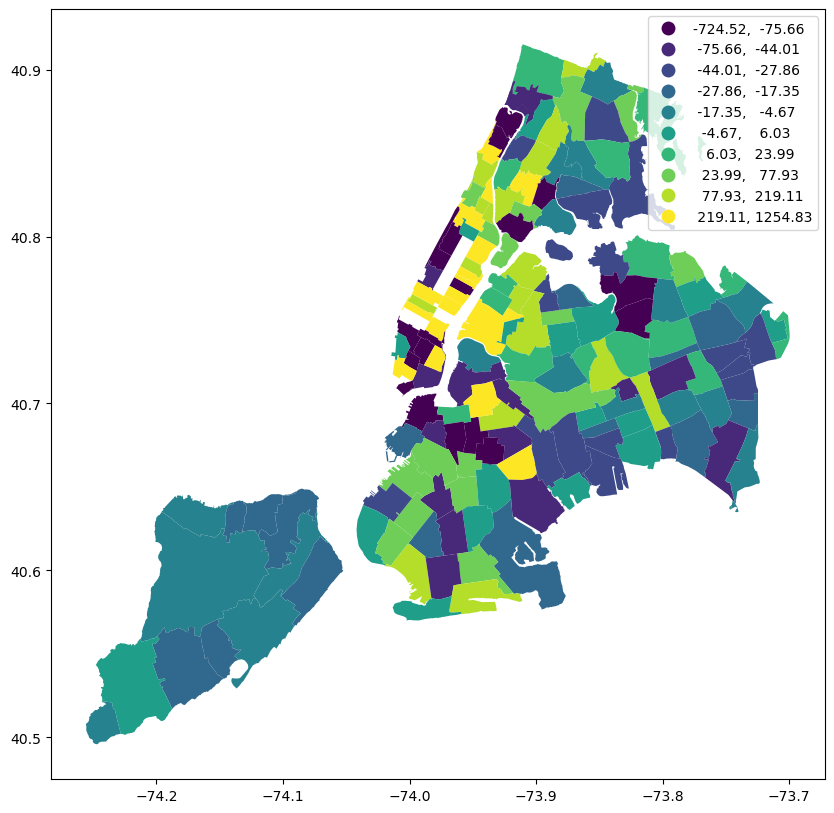

In [70]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_19-20' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

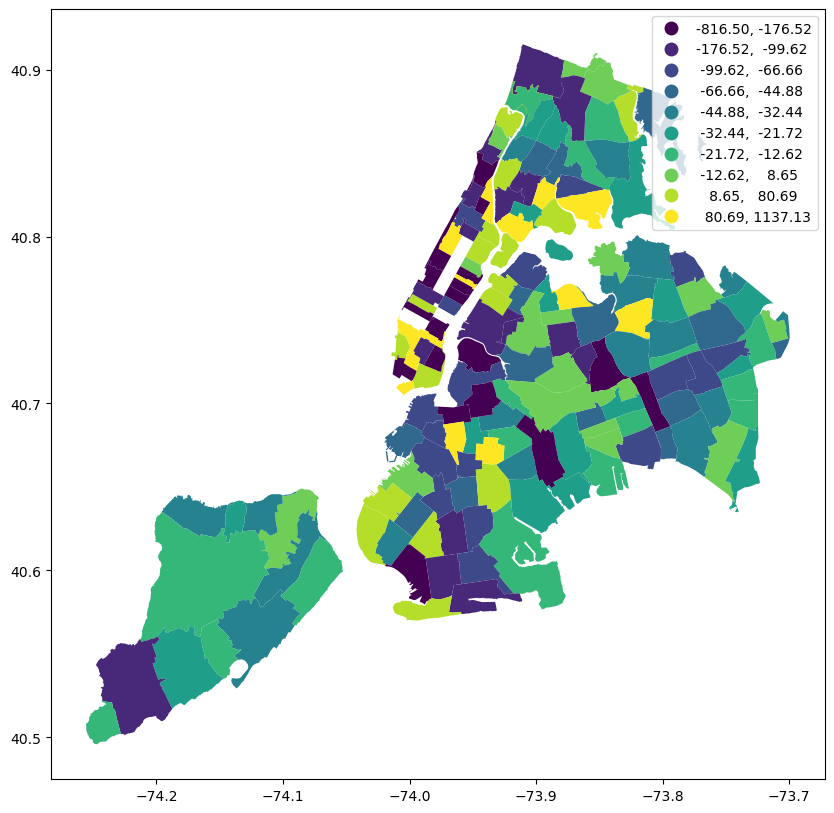

In [72]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_20-21' ,k=10,scheme = 'Quantiles', legend=True)
